In [1]:
import cmlreaders as cml
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings; warnings.simplefilter('ignore')
pd.options.display.max_columns=None
pd.options.display.max_rows=100
from IPython.display import display, Markdown, HTML
import pandas_to_pybeh as pb
from tqdm import tqdm_notebook as lol
import time
import scipy
import rep_pybeh as rpb
from plotting import *
data_set = 'hospital'
error_bars ={'elinewidth':1.5, 'capsize':3, 'capthick':1.5}



## Hospital Data Load

In [2]:
if data_set == 'hospital':
    evs = []
    data = cml.get_data_index(kind = 'r1'); data = data[data['experiment'] == 'RepFR1']
    for subject, df in data.groupby('subject'):
        for session in pd.unique(df['session']):
            try:
                r = cml.CMLReader(subject=subject, experiment='RepFR1', session=session)
                temp = r.load('task_events')
                evs.append(temp)
            except: print('subj', subject, session, "didn't work")
    evs = pd.concat(evs)
    evs = evs[evs.list != 0]

subj R1593D 4 didn't work
subj R1593D 5 didn't work


## Scalp Data Load

In [3]:
if data_set == 'scalp':
    evs = []
    data = cml.get_data_index(kind = 'ltp'); data = data[data['experiment'] == 'ltpRepFR']
    for subject, df in data.groupby('subject'):
        for session in pd.unique(df['session']):
            r = cml.CMLReader(subject=subject, experiment='ltpRepFR', session=session)
            temp = r.load('all_events')
            evs.append(temp)
    evs = pd.concat(evs)
    evs = evs[evs.list != 0]

In [4]:
sub_crps = []
crp = []
num_lags = 8
for i, beh in lol(evs.groupby('subject')):
    sess_crps = []
    for j, df in beh.groupby('session'):
        df = rpb.get_act_spos(df)
        sess_crp = rpb.crp(df, num_lags = num_lags, list_length = 27)
        sess_crps.append(sess_crp)
    sub_crp = pd.concat(sess_crps).groupby('lag').mean()
    crp.append(sub_crp)
crp = pd.concat(crp)
crp.reset_index(inplace = True)


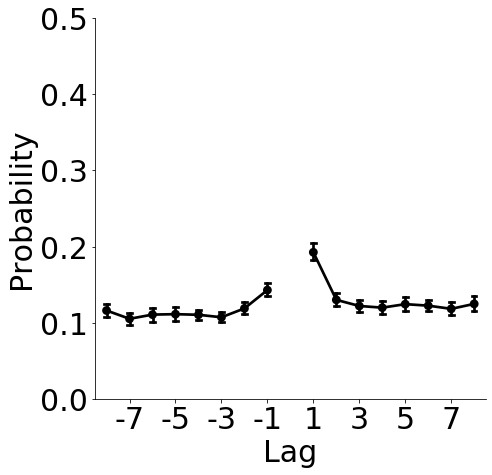

In [5]:
set_axes(ylim = [0, 0.5], fontsize = 30, xticks = np.arange(0, 8, 2))



sns.pointplot(data = crp , x = 'lag', y = 'prob', capsize = 0.2, color = 'black')
# _ = plt.xticks(range(-num_lags, num_lags+1), fontsize = 14)
# _ = plt.yticks(fontsize = 14)
# # _ = plt.grid()
# _ = plt.xlim(-num_lags - 0.5, num_lags + 0.5)

# plt.xticks(np.arange(-8, 9, 2))
# _ = plt.title('Massed Lag-CRP (Hospital RepFR1)', fontsize = 18)
locs, labels = plt.xticks() 
_=plt.xticks(locs[1::2], labels[1::2])
_ = plt.ylabel('Probability')
_ = plt.xlabel('Lag')

plt.savefig(data_set +'_figs/crp.pdf')

### Minimum Lag-CRP

In [6]:
sub_crps = []
min_crps = []
num_lags = 8
for i, beh in lol(evs.groupby('subject')):
    sess_crps = []
    for j, df in beh.groupby('session'):
        df = rpb.get_act_spos(df)
        sess_crp = rpb.min_crp(df, num_lags = num_lags, list_length = 27, halfornah = 'nah')
        sess_crps.append(sess_crp)
    sub_crp = pd.concat(sess_crps).groupby('lag').mean()
    min_crps.append(sub_crp)
min_crps = pd.concat(min_crps)
min_crps.reset_index(inplace = True)
min_crps.to_csv(data_set+'_min_crp.csv')

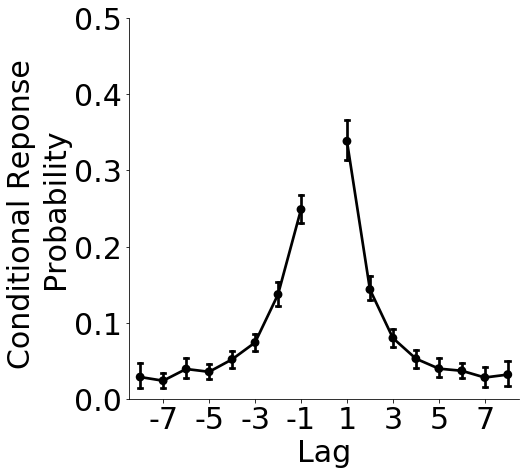

In [7]:
set_axes(ylim = [0, 0.5], fontsize = 30, xticks = np.arange(0, 8, 2))
sns.pointplot(data = min_crps , x = 'lag', y = 'prob', capsize = 0.2, color = 'black')
_ = plt.ylabel('Conditional Reponse \nProbability', fontsize = 30)
_ = plt.xlabel('Lag')
locs, labels = plt.xticks() 
_=plt.xticks(locs[1::2], labels[1::2])
plt.savefig(data_set +'_figs/min_crp.pdf', bbox_inches='tight')


In [8]:
sub_crps = []
min_crps = []
num_lags = 8
for i, beh in lol(evs.groupby('subject')):
    sess_crps = []
    for j, df in beh.groupby('session'):
        df = rpb.get_act_spos(df)
        sess_crp = rpb.min_crp(df, num_lags = num_lags, list_length = 27, halfornah = 'yah')
        sess_crps.append(sess_crp)
    sub_crp = pd.concat(sess_crps).groupby('lag').mean()
    min_crps.append(sub_crp)
min_crps = pd.concat(min_crps)
min_crps.reset_index(inplace = True)

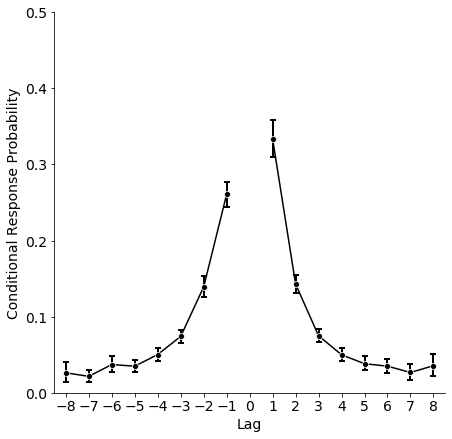

In [9]:
fig, ax = plt.subplots(figsize=(7, 7))
error_bars ={'elinewidth':2, 'capsize':3, 'capthick':2}
right_side = ax.spines["right"]
right_side.set_visible(False)
top_side = ax.spines["top"]
top_side.set_visible(False)


g = sns.lineplot(data = min_crps[min_crps.lag > 0], x = 'lag', y = 'prob', err_style = 'bars', ci = 95, marker = 'o', color = 'black', err_kws=error_bars)
g = sns.lineplot(data = min_crps[min_crps.lag < 0], x = 'lag', y = 'prob', err_style = 'bars', ci = 95, marker = 'o', color = 'black', err_kws=error_bars)
_ = plt.xticks(range(-num_lags, num_lags+1), fontsize = 14)
_ = plt.yticks(fontsize = 14)
# _ = plt.grid()
_ = plt.xlim(-num_lags - 0.5, num_lags + 0.5)

# _ = plt.title('Massed Lag-CRP (Hospital RepFR1)', fontsize = 18)
_ = plt.ylabel('Conditional Response Probability', fontsize = 14)
_ = plt.xlabel('Lag', fontsize = 14)
_ = plt.ylim([0, 0.5])
plt.savefig(data_set +'_half_min_crp.pdf')